<center>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0101EN-Coursera/v2/M5_Final/images/SN_web_lightmode.png" width="300">
</center>


<h1>Analysis of Global COVID-19 Pandemic Data</h1>


## Overview:
This project focuses on analyzing the global COVID-19 pandemic. It involves identifying countries with a higher ratio of confirmed cases relative to their population, calculating the worldwide COVID-19 testing positive ratio, and performing other related analyses using the R programming language.


In [1]:
# This lab requires 'httr' and 'rvest'packages, which are already pre-loaded into this lab environment.
# However, if you are working on your local RStudio, please uncomment the below codes and install the packages.

install.packages("httr")
install.packages("rvest")

package 'httr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hisan\AppData\Local\Temp\RtmpkxbuZ3\downloaded_packages
package 'rvest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hisan\AppData\Local\Temp\RtmpkxbuZ3\downloaded_packages


In [2]:
library(httr)
library(rvest)

Warning message:
"package 'httr' was built under R version 4.4.3"
Warning message:
"package 'rvest' was built under R version 4.4.3"


Note: if you can import above libraries, please use install.packages() to install them first.


## TASK 1: Get a `COVID-19 pandemic` Wiki page using HTTP request


First, let's write a function to use HTTP request to get a public COVID-19 Wiki page.

Before you write the function, you can open this public page from this 

URL https://en.wikipedia.org/w/index.php?title=Template:COVID-19_testing_by_country using a web browser.

The goal of task 1 is to get the html page using HTTP request (`httr` library)


In [3]:

get_wiki_covid19_page <- function() {
    # Our target COVID-19 wiki page URL is: https://en.wikipedia.org/w/index.php?title=Template:COVID-19_testing_by_country  
  # Which has two parts: 
    # 1) base URL `https://en.wikipedia.org/w/index.php  
    # 2) URL parameter: `title=Template:COVID-19_testing_by_country`, seperated by question mark ?
    
  # Wiki page base
  wiki_base_url <- "https://en.wikipedia.org/w/index.php?title=Template:COVID-19_testing_by_country"
  # You will need to create a List which has an element called `title` to specify which page you want to get from Wiki
  # in our case, it will be `Template:COVID-19_testing_by_country`
  query_params <- list(title ='Template:COVID-19_testing_by_country')
  # - Use the `GET` function in httr library with a `url` argument and a `query` arugment to get a HTTP response
  response <- GET(url=wiki_base_url, query=query_params)
  # Use the `return` function to return the response
  return(response)
}




In [4]:
# Call the get_wiki_covid19_page function and print the response
get_wiki_covid19_page()

Response [https://en.wikipedia.org/w/index.php?title=Template%3ACOVID-19_testing_by_country]
  Date: 2025-03-18 09:04
  Status: 200
  Content-Type: text/html; charset=UTF-8
  Size: 469 kB
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-fea...
<head>
<meta charset="UTF-8">
<title>Template:COVID-19 testing by country - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-heade...
RLSTATE={"ext.globalCssJs.user.styles":"ready","site.styles":"ready","user.st...
<script>(RLQ=window.RLQ||[]).push(function(){mw.loader.impl(function(){return...
}];});});</script>
<link rel="stylesheet" href="/w/load.php?lang=en&amp;modules=ext.cite.styles%...
...

## TASK 2: Extract COVID-19 testing data table from the wiki HTML page


On the COVID-19 testing wiki page, you should see a data table `<table>` node contains COVID-19 testing data by country on the page:

<a href="https://cognitiveclass.ai/">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0101EN-Coursera/v2/M5_Final/images/covid-19-by-country.png" width="400" align="center">
</a>

Note the numbers you actually see on your page may be different from above because it is still an on-going pandemic when creating this notebook.

The goal of task 2 is to extract above data table and convert it into a data frame


Now use the `read_html` function in rvest library to get the root html node from response


In [5]:
# Get the root html node from the http response in task 1 
root_node <- read_html("https://en.wikipedia.org/w/index.php?title=Template:COVID-19_testing_by_country")
root_node

{html_document}
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body class="skin--responsive skin-vector skin-vector-search-vue mediawik ...

Get the tables in the HTML root node using `html_nodes` function.


In [6]:
# Get the table node from the root html node
table_node <- html_nodes(root_node, "table")

Read the specific table from the multiple tables in the `table_node` using the `html_table` function and convert it into dataframe using `as.data.frame`

_Hint:- Please read the `table_node` with index 2(ex:- table_node[2])._


In [7]:
# Read the table node and convert it into a data frame, and print the data frame for review
covid_df <- html_table(table_node)
covid_df

[[1]]
# A tibble: 1 × 2
  X1    X2                                                                      
  <lgl> <chr>                                                                   
1 NA    This template needs to be updated.  Please help update this template to…

[[2]]
# A tibble: 173 × 9
   `Country or region` `Date[a]`   Tested      `Units[b]` `Confirmed(cases)`
   <chr>               <chr>       <chr>       <chr>      <chr>             
 1 Afghanistan         17 Dec 2020 154,767     samples    49,621            
 2 Albania             18 Feb 2021 428,654     samples    96,838            
 3 Algeria             2 Nov 2020  230,553     samples    58,574            
 4 Andorra             23 Feb 2022 300,307     samples    37,958            
 5 Angola              2 Feb 2021  399,228     samples    20,981            
 6 Antigua and Barbuda 6 Mar 2021  15,268      samples    832               
 7 Argentina           16 Apr 2022 35,716,069  samples    9,060,495         
 8 Armenia             29 May 2022 3,099,602   samples    422,963           
 9 Australia           9 Sep 2022  78,548,492  samples    10,112,229        
10 Austria             1 Feb 2023  205,817,752 samples    5,789,991         
# ℹ 163 more rows
# ℹ 4 more variables: `Confirmed /tested,%` <chr>,
#   `Tested /population,%` <chr>, `Confirmed /population,%` <chr>, Ref. <chr>

[[3]]
# A tibble: 1 × 2
  X1    X2                                                                      
  <lgl> <chr>                                                                   
1 NA    "This template uses TemplateStyles:\nTemplate:COVID-19 testing by count…

[[4]]
# A tibble: 1 × 5
  Parameter Parameter Description    Type    Status  
  <chr>     <chr>     <chr>          <chr>   <chr>   
1 state     state     no description Unknown optional

## TASK 3: Pre-process and export the extracted data frame

The goal of task 3 is to pre-process the extracted data frame from the previous step, and export it as a csv file


Let's get a summary of the data frame


As you can see from the summary, the columns names are little bit different to understand and some column data types are not correct. For example, the `Tested` column shows as `character`. 

As such, the data frame read from HTML table will need some pre-processing such as removing irrelvant columns, renaming columns, and convert columns into proper data types.


In [8]:
# Print the summary of the data frame
str(covid_df)

List of 4
 $ : tibble [1 × 2] (S3: tbl_df/tbl/data.frame)
  ..$ X1: logi NA
  ..$ X2: chr "This template needs to be updated.  Please help update this template to reflect recent events or newly availabl"| __truncated__
 $ : tibble [173 × 9] (S3: tbl_df/tbl/data.frame)
  ..$ Country or region      : chr [1:173] "Afghanistan" "Albania" "Algeria" "Andorra" ...
  ..$ Date[a]                : chr [1:173] "17 Dec 2020" "18 Feb 2021" "2 Nov 2020" "23 Feb 2022" ...
  ..$ Tested                 : chr [1:173] "154,767" "428,654" "230,553" "300,307" ...
  ..$ Units[b]               : chr [1:173] "samples" "samples" "samples" "samples" ...
  ..$ Confirmed(cases)       : chr [1:173] "49,621" "96,838" "58,574" "37,958" ...
  ..$ Confirmed /tested,%    : chr [1:173] "32.1" "22.6" "25.4" "12.6" ...
  ..$ Tested /population,%   : chr [1:173] "0.40" "15.0" "0.53" "387" ...
  ..$ Confirmed /population,%: chr [1:173] "0.13" "3.4" "0.13" "49.0" ...
  ..$ Ref.                   : chr [1:173] "[1]" "[2]" "[3

In [9]:
# This is a list, so we need to convert it to data frame
# Extract the relevant part of the list

main_data_frame <- covid_df[[2]]

We have prepared a pre-processing function for you to conver the data frame but you can also try to write one by yourself


In [11]:

preprocess_covid_data_frame <- function(data_frame) {
    
    print(dim(data_frame))

    # Remove the World row
    #data_frame<-data_frame[!(data_frame$`Country.or.region`=="World"),]
    # Remove the last row
    data_frame <- data_frame[1:172,]
    
    # We dont need the Units and Ref columns, so can be removed
    data_frame["Ref."] <- NULL
    data_frame["Units[b]"] <- NULL
    print(ncol(data_frame))
    print(names(data_frame))
    
    # Renaming the columns
    names(data_frame) <- c("country", "date", "tested", "confirmed", "confirmed.tested.ratio", "tested.population.ratio", "confirmed.population.ratio")
    
    # Convert column data types
    data_frame$country <- as.factor(data_frame$country)
    data_frame$date <- as.factor(data_frame$date)
    data_frame$tested <- as.numeric(gsub(",","",data_frame$tested))
    data_frame$confirmed <- as.numeric(gsub(",","",data_frame$confirmed))
    data_frame$'confirmed.tested.ratio' <- as.numeric(gsub(",","",data_frame$`confirmed.tested.ratio`))
    data_frame$'tested.population.ratio' <- as.numeric(gsub(",","",data_frame$`tested.population.ratio`))
    data_frame$'confirmed.population.ratio' <- as.numeric(gsub(",","",data_frame$`confirmed.population.ratio`))
    
    return(data_frame)
}


Call the `preprocess_covid_data_frame` function


In [12]:
# call `preprocess_covid_data_frame` function and assign it to a new data frame
covid_19_df <- preprocess_covid_data_frame(main_data_frame)

[1] 173   9
[1] 7
[1] "Country or region"       "Date[a]"                
[3] "Tested"                  "Confirmed(cases)"       
[5] "Confirmed /tested,%"     "Tested /population,%"   
[7] "Confirmed /population,%"


Get the summary of the processed data frame again


In [13]:
# Print the summary of the processed data frame again
str(covid_19_df)

tibble [172 × 7] (S3: tbl_df/tbl/data.frame)
 $ country                   : Factor w/ 172 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ date                      : Factor w/ 141 levels "1 Aug 2021","1 Feb 2023",..: 32 38 49 60 44 124 29 90 141 2 ...
 $ tested                    : num [1:172] 154767 428654 230553 300307 399228 ...
 $ confirmed                 : num [1:172] 49621 96838 58574 37958 20981 ...
 $ confirmed.tested.ratio    : num [1:172] 32.1 22.6 25.4 12.6 5.3 5.4 25.4 13.6 12.9 2.8 ...
 $ tested.population.ratio   : num [1:172] 0.4 15 0.53 387 1.3 ...
 $ confirmed.population.ratio: num [1:172] 0.13 3.4 0.13 49 0.067 0.86 20 14.3 40.3 65 ...


After pre-processing, you can see the columns and columns names are simplified, and columns types are converted into correct types.


The data frame has following columns:

- **country** - The name of the country
- **date** - Reported date
- **tested** - Total tested cases by the reported date
- **confirmed** - Total confirmed cases by the reported date
- **confirmed.tested.ratio** - The ratio of confirmed cases to the tested cases
- **tested.population.ratio** - The ratio of tested cases to the population of the country
- **confirmed.population.ratio** - The ratio of confirmed cases to the population of the country


OK, we can call `write.csv()` function to save the csv file into a file. 


In [14]:
# Export the data frame to a csv file
write.csv(covid_19_df, "covid.csv")

In [15]:
# Get working directory
wd <- getwd()
# Get exported 
file_path <- paste(wd, sep="", "/covid.csv")
# File path
print(file_path)
file.exists(file_path)

[1] "C:/Users/hisan/OneDrive/Creative Cloud Files/covid.csv"


[1] TRUE

**Optional Step**: If you have difficulties finishing above webscraping tasks, you may still continue with next tasks by downloading a provided csv file from here:


In [16]:
## Download a sample csv file
# covid_csv_file <- download.file("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0101EN-Coursera/v2/dataset/covid.csv", destfile="covid.csv")
# covid_data_frame_csv <- read.csv("covid.csv", header=TRUE, sep=",")

## TASK 4: Get a subset of the extracted data frame

The goal of task 4 is to get the 5th to 10th rows from the data frame with only `country` and `confirmed` columns selected


In [17]:
# Read covid_data_frame_csv from the csv file
covid_df = read.csv("covid.csv")
# Get the 5th to 10th rows, with two "country" "confirmed" columns
covid_df[5:10, c('country','confirmed')]

,country,confirmed
,<chr>,<int>
5,Angola,20981
6,Antigua and Barbuda,832
7,Argentina,9060495
8,Armenia,422963
9,Australia,10112229
10,Austria,5789991


## TASK 5: Calculate worldwide COVID testing positive ratio

The goal of task 5 is to get the total confirmed and tested cases worldwide, and try to figure the overall positive ratio using `confirmed cases / tested cases`


In [18]:
# Get the total confirmed cases worldwide
total_confirmed_case = sum(covid_df['confirmed'])
paste('Total confirmed case worldwide :', total_confirmed_case)

# Get the total tested cases worldwide
total_tested_case = sum(covid_df['tested'])
paste('Total tested case worldwide :', total_tested_case)

# Get the positive ratio (confirmed / tested)
positive_ratio = total_confirmed_case / total_tested_case
paste('Positive Ratio :', positive_ratio)

[1] "Total confirmed case worldwide : 431434555"

[1] "Total tested case worldwide : 5396881644"

[1] "Positive Ratio : 0.0799414520197323"

## TASK 6: Get a country list which reported their testing data 

The goal of task 6 is to get a catalog or sorted list of countries who have reported their COVID-19 testing data


In [19]:
# Get the `country` column
country = covid_df[['country']]

# Check its class (should be Factor)
class(country)

# Convert the country column into character so that you can easily sort them
chr_country <- as.character(country)

# Sort the countries AtoZ
country_a_z <- sort(chr_country)

# Sort the countries ZtoA
country_z_a <- sort(chr_country, decreasing = TRUE)

# Print the sorted ZtoA list
print(country_z_a)

[1] "character"

  [1] "Zimbabwe"               "Zambia"                 "Vietnam"               
  [4] "Venezuela"              "Uzbekistan"             "Uruguay"               
  [7] "United States"          "United Kingdom"         "United Arab Emirates"  
 [10] "Ukraine"                "Uganda"                 "Turkey"                
 [13] "Tunisia"                "Trinidad and Tobago"    "Togo"                  
 [16] "Thailand"               "Tanzania"               "Taiwan[m]"             
 [19] "Switzerland[l]"         "Sweden"                 "Sudan"                 
 [22] "Sri Lanka"              "Spain"                  "South Sudan"           
 [25] "South Korea"            "South Africa"           "Slovenia"              
 [28] "Slovakia"               "Singapore"              "Serbia"                
 [31] "Senegal"                "Saudi Arabia"           "San Marino"            
 [34] "Saint Vincent"          "Saint Lucia"            "Saint Kitts and Nevis" 
 [37] "Rwanda"              

## TASK 7: Identify countries names with a specific pattern

The goal of task 7 is using a regular expression to find any countires start with `United`


In [20]:
# Use a regular expression `United.+` to find matches
matches <- grep('United.+', chr_country, value=TRUE)
# Print the matched country names
matches

[1] "United Arab Emirates" "United Kingdom"       "United States"

## TASK 8: Pick two countries you are interested, and then review their testing data

The goal of task 8 is to compare the COVID-19 test data between two countires, you will need to select two rows from the dataframe, and select `country`, `confirmed`, `confirmed-population-ratio` columns


In [21]:
# Select a subset (should be only one row) of data frame based on a selected country name and columns
test1 <- covid_df[country =='India', c('country','confirmed','confirmed.population.ratio')]
test1
# Select a subset (should be only one row) of data frame based on a selected country name and columns
test2 <- covid_df[country == 'Australia', c('country','confirmed','confirmed.population.ratio')]
test2

,country,confirmed,confirmed.population.ratio
,<chr>,<int>,<dbl>
73,India,43585554,31.7


,country,confirmed,confirmed.population.ratio
,<chr>,<int>,<dbl>
9,Australia,10112229,40.3


## TASK 9: Compare which one of the selected countries has a larger ratio of confirmed cases to population

The goal of task 9 is to find out which country you have selected before has larger ratio of confirmed cases to population, which may indicate that country has higher COVID-19 infection risk


In [22]:
# Use if-else statement
 if(test1['confirmed.population.ratio'] > test2['confirmed.population.ratio']) {
    print(test1['country'])
 } else {
    print(test2['country'])
 }


    country
9 Australia


## TASK 10: Find countries with confirmed to population ratio rate less than a threshold

The goal of task 10 is to find out which countries have the confirmed to population ratio less than 1%, it may indicate the risk of those countries are relatively low


In [23]:
# Get a subset of any countries with `confirmed.population.ratio` less than the threshold
low_risk_countries <- function(data_frame, threshold=0.01) {
    result <- data_frame[data_frame$`confirmed.population.ratio` < threshold, 'country']
    return(result)
}

In [24]:
low_risk_countries(covid_df,0.01)

[1] "Burundi"     "China[c]"    "Laos"        "North Korea" "Tanzania"

In [28]:
colnames(covid_df)

[1] "X"                          "country"                   
[3] "date"                       "tested"                    
[5] "confirmed"                  "confirmed.tested.ratio"    
[7] "tested.population.ratio"    "confirmed.population.ratio"

## Visualizations

In [47]:
library(ggplot2)
library(dplyr)

## 1. 📊 Top 10 Countries by Total Confirmed Cases

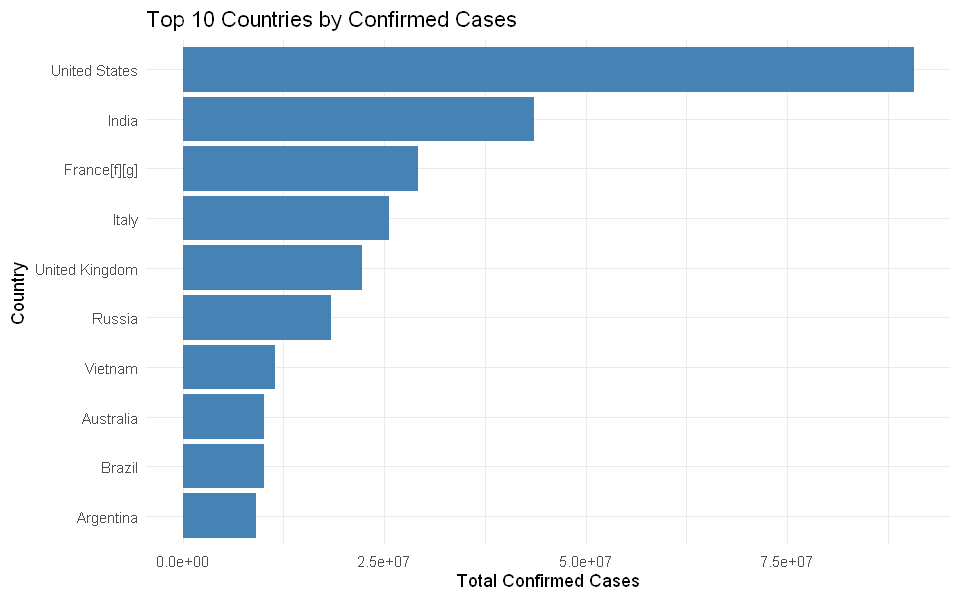

In [95]:
library(dplyr)
library(ggplot2)

top10_confirmed <- covid_df %>%
  arrange(desc(confirmed)) %>%
  head(10)

ggplot(top10_confirmed, aes(x = reorder(country, confirmed), y = confirmed)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Top 10 Countries by Confirmed Cases",
       x = "Country", y = "Total Confirmed Cases") +
  theme_minimal()


## 📊 Confirmed/Population Ratio by Country

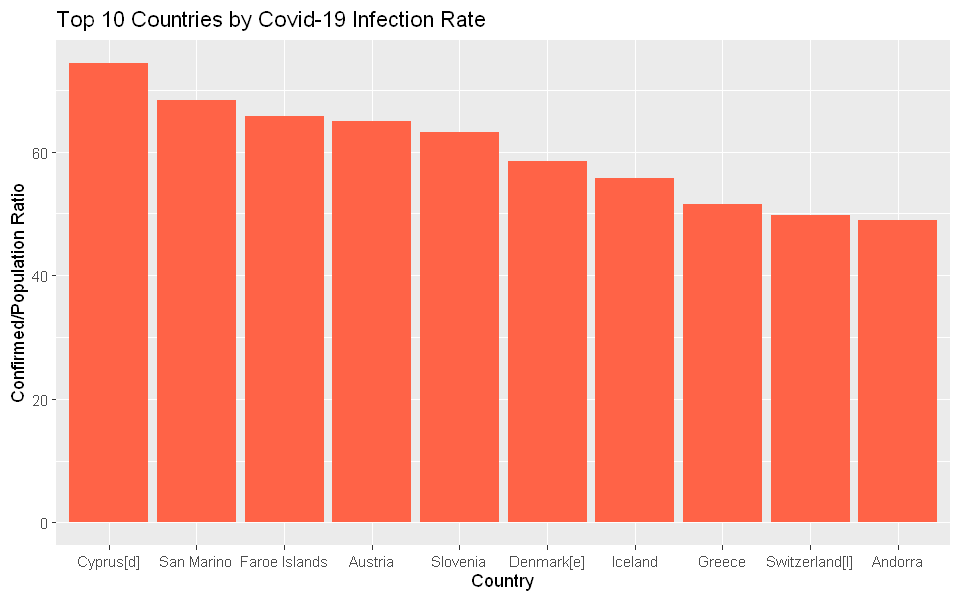

In [67]:
options(repr.plot.width = 8, repr.plot.height = 5)

top10 <- covid_df %>%
  arrange(desc(confirmed.population.ratio)) %>%
  head(10)

ggplot(top10, aes(x = reorder(country, -confirmed.population.ratio),
                  y = confirmed.population.ratio)) +
  geom_bar(stat = "identity", fill = "tomato") +
  labs(title = "Top 10 Countries by Covid-19 Infection Rate",
       x = "Country", y = "Confirmed/Population Ratio") 

## 📈 Top 10 Tested vs Confirmed Cases

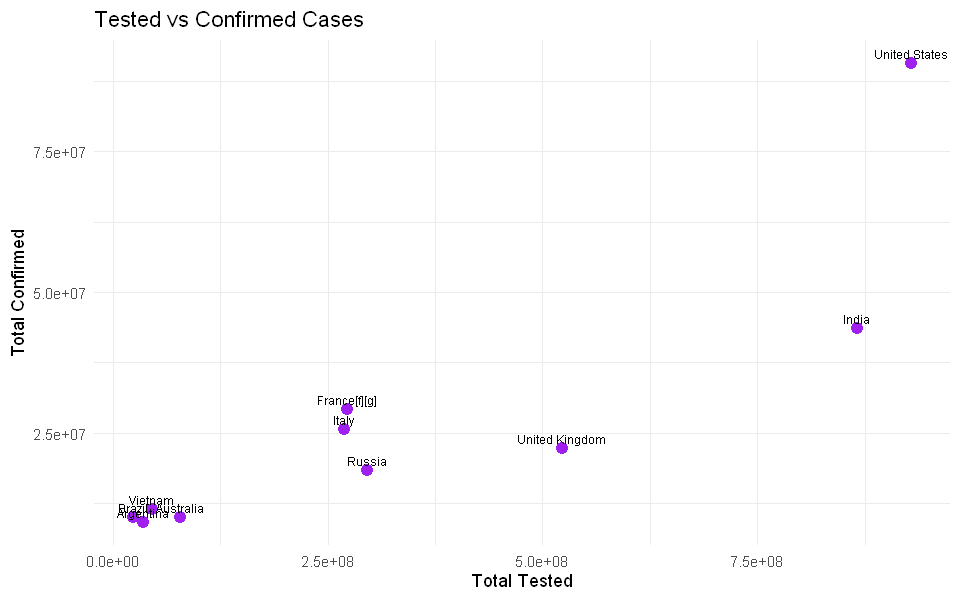

In [103]:
top10 <- covid_df %>%
  arrange(desc(confirmed)) %>%
  head(10)

ggplot(top10, aes(x = tested, y = confirmed, label = country)) +
  geom_point(color = "purple", size = 3) +
  geom_text(vjust = -0.5, size = 2.5) +
  labs(title = "Tested vs Confirmed Cases",
       x = "Total Tested", y = "Total Confirmed") +
  theme_minimal()


## 📉 Top 10 Countries by Testing per Population

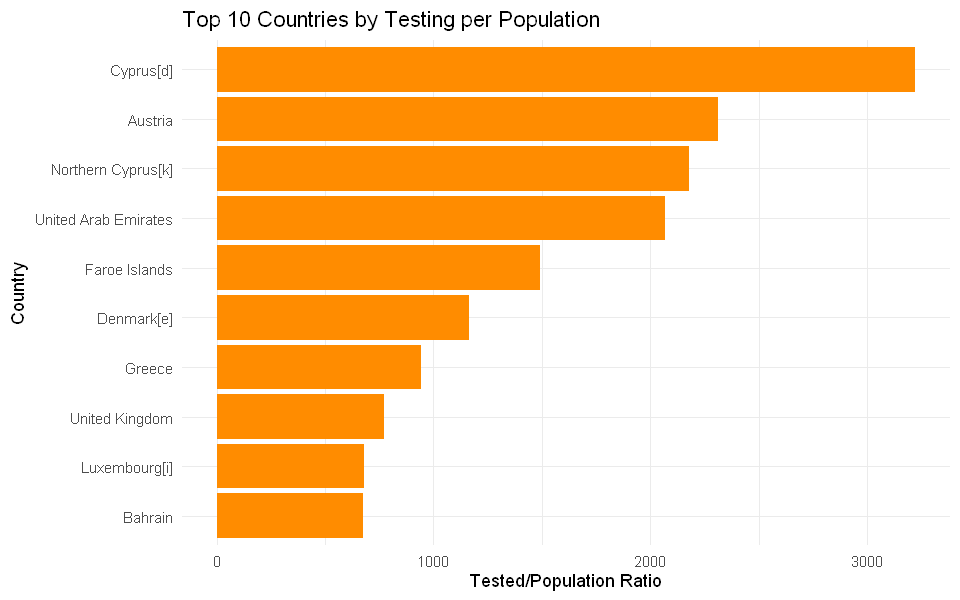

In [104]:
top10_tested_ratio <- covid_df %>%
  arrange(desc(tested.population.ratio)) %>%
  head(10)

ggplot(top10_tested_ratio, aes(x = reorder(country, tested.population.ratio), 
                               y = tested.population.ratio)) +
  geom_bar(stat = "identity", fill = "darkorange") +
  coord_flip() +
  labs(title = "Top 10 Countries by Testing per Population",
       x = "Country", y = "Tested/Population Ratio") +
  theme_minimal()
